# Movie Prediction
---

## Data info
Data link: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset




### Data Description
The data are contained in six files.

* tag.csv that contains tags applied to movies by users:
    * userId
    * movieId
    * tag
    * timestamp

* rating.csv that contains ratings of movies by users:
    * userId
    * movieId
    * rating
    * timestamp

* movie.csv that contains movie information:
    * movieId
    * title
    * genres

* genome_scores.csv that contains movie-tag relevance data:
    * movieId
    * tagId
    * relevance

* genome_tags.csv that contains tag descriptions:
    * tagId
    * tag


## Preparation of Data Set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [3]:
movie_df = pd.read_csv('data/movie.csv')
rating_df = pd.read_csv('data/rating.csv')
tag_df = pd.read_csv('data/tag.csv')
genome_scores_df = pd.read_csv('data/genome_scores.csv')
genome_tags_df = pd.read_csv('data/genome_tags.csv')


In [4]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [6]:
tag_df.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [7]:
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [8]:
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


## Merging Data Frames

In [9]:
rating_df = rating_df.rename(columns={"timestamp": "rating_timestamp"})

In [ ]:
movie_ratings = pd.merge(rating_df, movie_df, on="movieId", how="inner")
movie_ratings.head()

In [12]:
tag_df = tag_df.rename(columns={"timestamp": "tag_timestamp"})
movie_tags = pd.merge(tag_df, movie_df, on='movieId', how="outer")


In [13]:
movie_tags.head()

,userId,movieId,tag,tag_timestamp,title,genres
0,1644.0,1,Watched,2014-12-04 23:44:40,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1741.0,1,computer animation,2007-07-08 13:59:15,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1741.0,1,Disney animated feature,2007-07-08 22:21:47,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1741.0,1,Pixar animation,2007-07-08 22:46:10,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,1741.0,1,TÃ©a Leoni does not star in this movie,2009-06-15 19:19:33,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [14]:
tags_scores_df = pd.merge(genome_tags_df, genome_scores_df, on="tagId", how='inner')

In [15]:
tags_scores_df.head()

,tagId,tag,movieId,relevance
0,1,007,1,0.02500
1,1,007,2,0.03975
2,1,007,3,0.04350
3,1,007,4,0.03725
4,1,007,5,0.04200


In [16]:
def check_df(dataframe, head=5):
    print('\n##################### Shape #####################')
    print(dataframe.shape)
    print('\n##################### Types #####################')
    print(dataframe.dtypes)
    print('\n##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('\n##################### NA #####################')
    print(dataframe.isnull().sum())
    print('\n##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(movie_ratings)


##################### Shape #####################
(20000263, 6)

##################### Types #####################
userId                int64
movieId               int64
rating              float64
rating_timestamp     object
title                object
genres               object
dtype: object

##################### Head #####################
   userId  movieId  rating     rating_timestamp                                              title                                  genres
0       1        2     3.5  2005-04-02 23:53:47                                     Jumanji (1995)              Adventure|Children|Fantasy
1       1       29     3.5  2005-04-02 23:31:16  City of Lost Children, The (Cité des enfants p...  Adventure|Drama|Fantasy|Mystery|Sci-Fi
2       1       32     3.5  2005-04-02 23:33:39          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                 Mystery|Sci-Fi|Thriller
3       1       47     3.5  2005-04-02 23:32:07                        Seven (a.k.a. Se7en) (199

In [17]:
movie_ratings.head()

,userId,movieId,rating,rating_timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# EDA
## Распределение рейтингов

C:\Users\gulie\AppData\Local\Temp\ipykernel_15276\1776398693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=movie_ratings['rating'], palette="viridis")


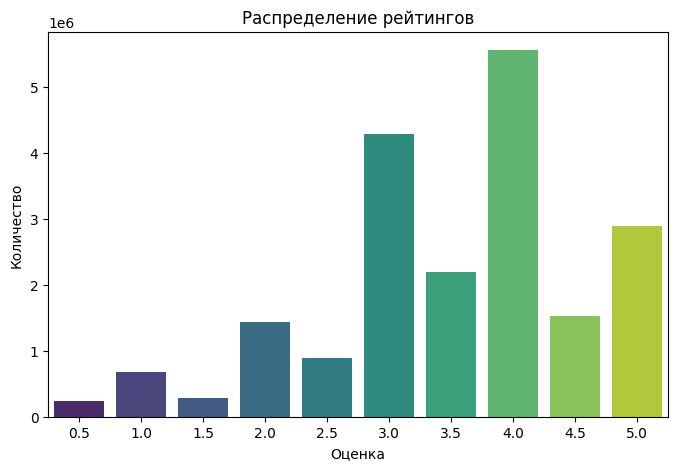

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x=movie_ratings['rating'], palette="viridis")
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.title("Распределение рейтингов")
plt.show()

## Самые популярные фильмы

C:\Users\gulie\AppData\Local\Temp\ipykernel_15276\2737392415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movie_titles['title'], palette="magma")


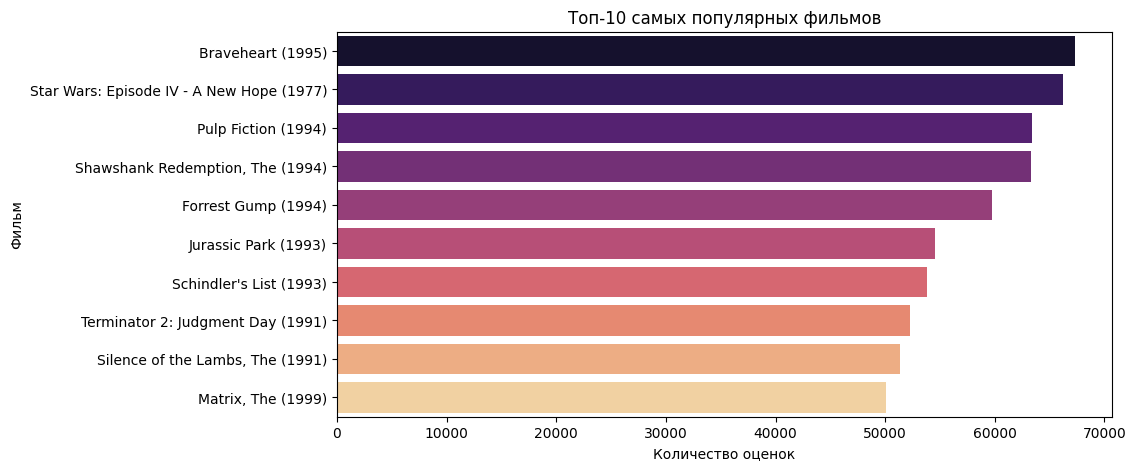

In [19]:
top_movies = rating_df['movieId'].value_counts().head(10)
top_movie_titles = movie_df[movie_df['movieId'].isin(top_movies.index)]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_movies.values, y=top_movie_titles['title'], palette="magma")
plt.xlabel("Количество оценок")
plt.ylabel("Фильм")
plt.title("Топ-10 самых популярных фильмов")
plt.show()


## Активность пользователей

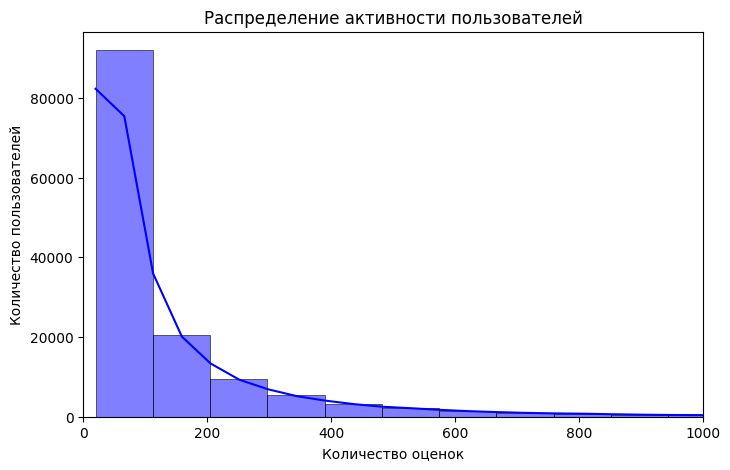

In [20]:
user_activity = rating_df.groupby('userId').size()

plt.figure(figsize=(8, 5))
sns.histplot(user_activity, bins=100, color="blue", kde=True)
plt.xlabel("Количество оценок")
plt.ylabel("Количество пользователей")
plt.title("Распределение активности пользователей")
plt.xlim(0, 1000)  # Обрежем редкие случаи с экстремальными значениями
plt.show()

## Распределение фильмов по жанрам

C:\Users\gulie\AppData\Local\Temp\ipykernel_15276\3801567433.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()), palette="coolwarm")


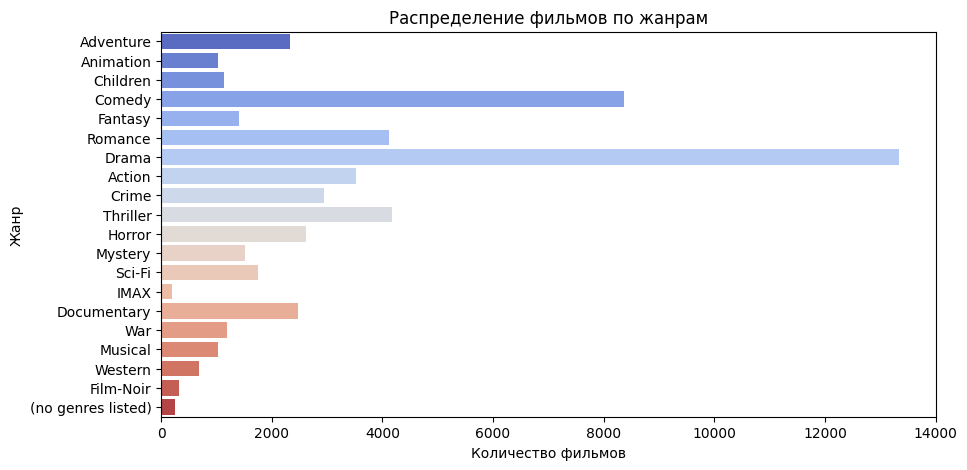

In [21]:
from collections import Counter

# Разбиваем жанры и считаем их количество
all_genres = movie_df['genres'].str.split('|').explode()
genre_counts = Counter(all_genres)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()), palette="coolwarm")
plt.xlabel("Количество фильмов")
plt.ylabel("Жанр")
plt.title("Распределение фильмов по жанрам")
plt.show()


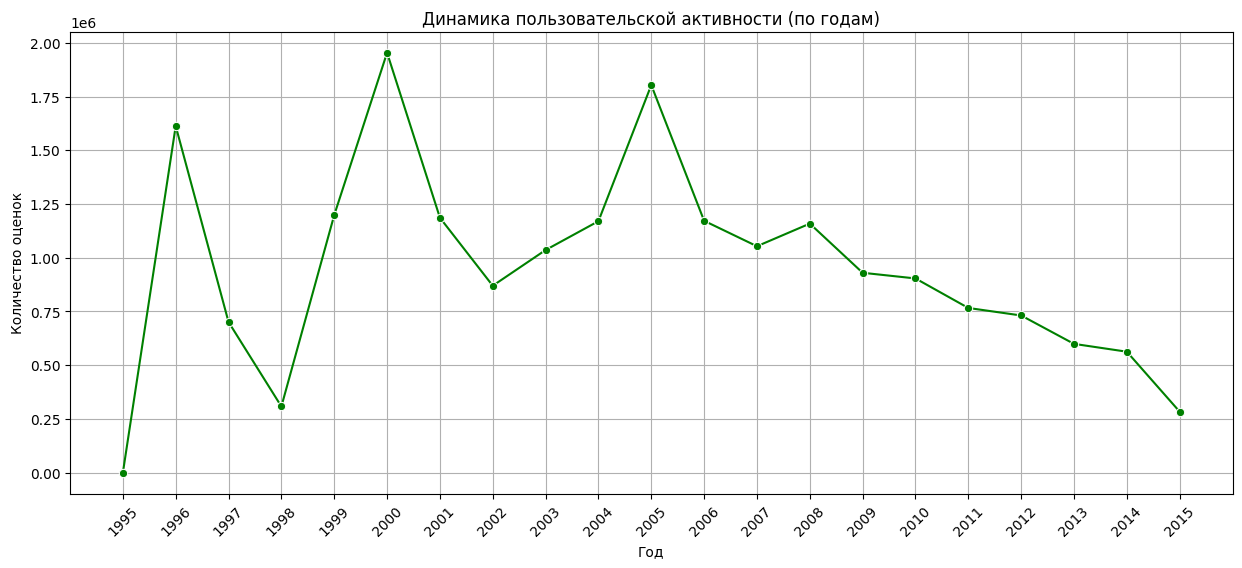

In [22]:
rating_df['rating_timestamp'] = pd.to_datetime(rating_df['rating_timestamp'], format='%Y-%m-%d %H:%M:%S')

# Добавляем колонку с годом
rating_df['year'] = rating_df['rating_timestamp'].dt.year

# Группируем по годам
ratings_per_year = rating_df.groupby('year').size()

# Строим график
plt.figure(figsize=(15, 6))
sns.lineplot(x=ratings_per_year.index.astype(str), y=ratings_per_year.values, marker='o', color='g')
plt.xticks(rotation=45)
plt.xlabel("Год")
plt.ylabel("Количество оценок")
plt.title("Динамика пользовательской активности (по годам)")
plt.grid(True)
plt.show()